In [ ]:
import cv2
from ultralytics import YOLO
import numpy as np
import matplotlib.pyplot as plt

# Load YOLOv8 pretrained model
model = YOLO("yolov8n.pt")  # or use yolov8s.pt for better accuracy

cap = cv2.VideoCapture("reckless1.mp4")  # <- Make sure this path is valid

while True:
    ret, frame = cap.read()
    if not ret or frame is None:
        print("End of video or failed to read frame.")
        break

    # Safe to use frame now
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    # Do processing...
    plt.imshow(frame_rgb)
    plt.axis('off')
    plt.show()





In [9]:
import cv2

cap = cv2.VideoCapture("reckless.mp4")  # Replace with correct path

if not cap.isOpened():
    print("❌ Failed to open video file.")
else:
    print("✅ Video loaded successfully.")


✅ Video loaded successfully.


In [ ]:
from ultralytics import YOLO
import cv2

# Load your YOLOv8 model
model = YOLO("yolov8n.pt")  # or yolov8m.pt, yolov8s.pt etc.

# Load the video
cap = cv2.VideoCapture("reckless1.mp4")
frame_count = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("End of video.")
        break

    frame_count += 1

    # Run YOLO detection
    results = model(frame)[0]

    # Plot results on the frame
    annotated_frame = results.plot()

    # Resize for preview (optional)
    preview = cv2.resize(annotated_frame, (800, 500))

    # Show the frame in Jupyter
    from IPython.display import display, clear_output
    from PIL import Image
    import numpy as np

    img_pil = Image.fromarray(cv2.cvtColor(preview, cv2.COLOR_BGR2RGB))
    clear_output(wait=True)
    display(img_pil)

cap.release()


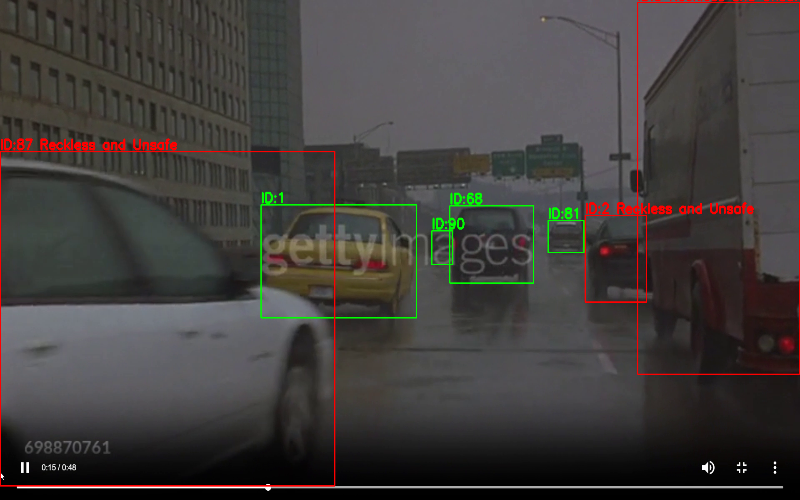

KeyboardInterrupt: 

In [2]:
from ultralytics import YOLO
import cv2
import numpy as np
from IPython.display import display, clear_output
from PIL import Image

# Load YOLOv8 model with tracking
model = YOLO("yolov8n.pt")  # Smallest and fastest for demo
model.fuse()  # Speeds up inference

# Video path
cap = cv2.VideoCapture("reckless1.mp4")

# Dictionary to track previous positions
prev_positions = {}
suspicious_ids = set()

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("End of video.")
        break

    # Run detection with tracking
    results = model.track(source=frame, persist=True, tracker="botsort.yaml")[0]

    for box in results.boxes:
        cls = int(box.cls[0])
        track_id = int(box.id[0]) if box.id is not None else None
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        center = ((x1 + x2) // 2, (y1 + y2) // 2)

        # Suspicious logic: sudden movement
        if track_id is not None:
            if track_id in prev_positions:
                prev_x, prev_y = prev_positions[track_id]
                dx = abs(center[0] - prev_x)
                dy = abs(center[1] - prev_y)
                if dx > 50 or dy > 50:  # Adjust this threshold
                    suspicious_ids.add(track_id)
            prev_positions[track_id] = center

        # Draw bounding box
        color = (0, 0, 255) if track_id in suspicious_ids else (0, 255, 0)
        label = f"ID:{track_id} {'Reckless and Unsafe' if track_id in suspicious_ids else ''}"
        cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)
        cv2.putText(frame, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 3)

    # Resize and display
    preview = cv2.resize(frame, (800, 500))
    img_pil = Image.fromarray(cv2.cvtColor(preview, cv2.COLOR_BGR2RGB))
    clear_output(wait=True)
    display(img_pil)

cap.release()


In [16]:
import cv2
import numpy as np
from ultralytics import YOLO

# Load YOLOv8 model with tracking enabled
model = YOLO("yolov8n.pt")
model.fuse()

# Input video path and output video path
input_video_path = "reckless1.mp4"
output_video_path = "output_suspicious_detected.mp4"

# Open the video file
cap = cv2.VideoCapture(input_video_path)
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

prev_positions = {}
suspicious_ids = set()
frame_count = 0

# To store timestamps or frame numbers of suspicious activity
suspicious_frames = []

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    results = model.track(source=frame, persist=True, tracker="botsort.yaml")[0]

    for box in results.boxes:
        cls = int(box.cls[0])
        track_id = int(box.id[0]) if box.id is not None else None
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        center = ((x1 + x2) // 2, (y1 + y2) // 2)

        if track_id is not None:
            if track_id in prev_positions:
                prev_x, prev_y = prev_positions[track_id]
                dx = abs(center[0] - prev_x)
                dy = abs(center[1] - prev_y)
                if dx > 50 or dy > 50:
                    suspicious_ids.add(track_id)
                    suspicious_frames.append(frame_count)
            prev_positions[track_id] = center

        color = (0, 0, 255) if track_id in suspicious_ids else (0, 255, 0)
        label = f"ID:{track_id} {'Reckless' if track_id in suspicious_ids else ''}"
        cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)
        cv2.putText(frame, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)

    out.write(frame)
    frame_count += 1

cap.release()
out.release()

output_video_path, suspicious_frames[:10]  # Return preview path and first few suspicious frames


YOLOv8n summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

0: 384x640 2 cars, 1 bus, 1 truck, 80.7ms
Speed: 5.6ms preprocess, 80.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 truck, 88.4ms
Speed: 7.2ms preprocess, 88.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 bus, 1 train, 1 truck, 85.0ms
Speed: 5.4ms preprocess, 85.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 96.5ms
Speed: 4.7ms preprocess, 96.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 2 trucks, 102.0ms
Speed: 4.0ms preprocess, 102.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 train, 1 truck, 112.8ms
Speed: 3.7ms preprocess, 112.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 train, 1 truck, 106.2ms
Speed: 5.3ms preprocess, 106.2ms inference, 1.

('output_suspicious_detected.mp4',
 [7, 14, 22, 65, 70, 129, 152, 184, 203, 206])